# Application of Data Science Tools for Financial Modeling. Production Sharing Agreement Cash Flow Projection.

## Abstract
The explosive growth of data science in the last few years enriched the world with ready-to-use tools for free (especially, R and Python). Fintech is bringing a new way in how the finance industry operates. However, some well-established spheres have kept the 'status quo' until the present time. Thus, financial and economic modeling, particularly in the oil & gas sector, mostly relies on commercial off-the-shelf software and MS Excel spreadsheets, the latter is the de-facto industry standard. This article is about demonstrating an alternative, data science based approach, with proper Python scripts and concluding analysis of the pros and cons of this approach.


## Introduction

Financial modeling is a discipline that requires domain knowledge in investment and accountancy, contracting laws, and other finance-related skills. To meet modern trends, those requirements should be supplemented by programming skills as well. 

As of today, the complex project financial models are mostly developed by using commercial software, or by flexible spreadsheets in Microsoft Excel. While both ways are beneficial, they are followed by side-effects. The first one is often a ‘black-box’ software with little chance to deep-dive into exact formulas, calculus precision, etc. Moreover, such solutions often require cloud-based storage of the financial modeling results, and that could be a barrier for the reason of data sensitivity. 

The other choice - MS Excel - is prone to some issues with the increase of modeling complexity. Too many formulas with inside and outside sheet links are overwhelming to review, and such options as Monte Carlo simulation needs a quite complex arrangement to be applied within MS Excel (not to mention cycling formula issues and large-size file failures). Also, manipulation with complex models may lead to inconsistencies and modeler headaches. 

It needs to be pointed out that such features as transparency, ease of reviewing a model (i.e. developed by contractors) and ease of testing the model are probably even more important. In addition, the ability to co-integrate a new model with a corporate modeling environment (i.e. to run it under changing external factors) has the effect of multiplying its value. 

The fast evolving field of data science and fintech leads to the development and maturing of efficient open-source modeling ecosystems. Thus, R and Python today provides a great opportunity for financial modeling with a stable and concise programming language, a wide range of supplementary packages, implementation tools aka ‘Jupyter notebook’, and a lot of learning and Q&A sources easily available online for free. 

Nowadays, Python is a standard modeling tool in investment banks and hedge funds, it’s [a tool for ABS cash flow assessment by the SEC](https://www.sec.gov/rules/proposed/2010/33-9117.pdf). There are some papers regarding [the advantages of spreadsheet substitution by Python](https://arxiv.org/ftp/arxiv/papers/1801/1801.09771.pdf), although there is room for improvement in the field. 

To tackle the problem mentioned above, a practical approach for project financial modeling with Python is presented below.  The business-case of upstream Production Sharing Agreement (PSA) financial modeling is discussed to fill the gap in the oil & gas industry. 

The rest of the paper is organized as follows: firstly, an introductory description of the modeling approach and tools will be discussed; secondly, the step-by-step scripting approach to developing a model will be presented; thirdly, the risk assessment approach will be under consideration in Part 2. Concluding remarks provide some inference on this research. 


## Part 1. Project Modeling


The business-case under consideration is about an independent oil & gas company (IOC) which is looking for a decision either to enter the project and sign a proper Production Sharing Agreement (PSA) with the State. This particular upstream project is determined by the PSA environment, presented in a book [(A. Inkpen and M.H. Moffett, The Global Oil&Gas Industry Management, Strategy & Finance. 2012)](https://www.amazon.com/Global-Oil-Gas-Industry-Management/dp/1593702396). All the following input data is based on the case from the book, reconciling the results.

To come up to the project modeling, the following steps will be proceeded:
1. Having a production profile, expecting a price USD20 per barrel and royalty, we will come to revenue estimation.
2. With capital expenditures (CAPEX) estimation and 5 years straight line (SL) depreciation we will get depreciation.
3. With yearly operational expenditures (OPEX) and applying cost recovery limit, we will estimate cost recovery cash flow.
4. Applying the profit oil split parameter we will calculate proper profit oil cash flows for IOC and State.
5. Considering bonuses, taxable income with tax loss carry forward, we will apply income tax to get net income for IOC and State.
6. Finally, we get the cash flow for both parties to calculate NPV, IRR, PI, PP, and DPP. 


### Scripting Specification
For the implementation of this project the following python packages were used:
- __numpy__ for vector and matrix manipulation,
- __pandas__ for efficient dealing with time-series,
- __scipy__ for distribution sampling and optimization,
- __multiprocessing__ for the Monte Carlo simulations,
- __matplotlib__ for simple pictures,
- __holoviews__ for informative plots and dashboards. 

Due to the simplicity of this example, all the data inputs are inserted directly to the Jupyter Notebook and no reading of external sources is required. Although it is worth to mention, that ease of dealing with external data is a strong capability of python. 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
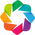

In [1]:
# import necessary python packages
import numpy as np
import numpy_financial as npf
import pandas as pd

#import scipy as sc
from scipy.stats import truncnorm, triang
from scipy.optimize import minimize

import multiprocessing as mp

import matplotlib.pyplot as plt
%matplotlib inline

import holoviews as hv
from holoviews.util.settings import OutputSettings
hv.extension('bokeh')

### Production Profile

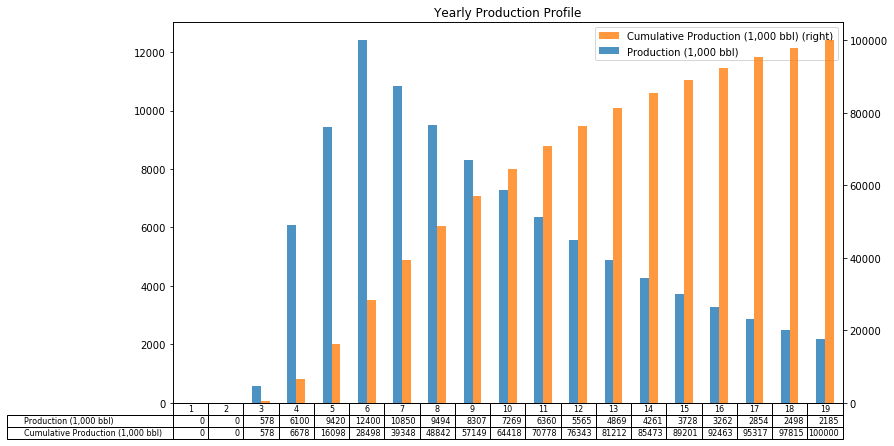

In [2]:
# Set Production Profile (values in thousands of barrels) for each year
df = pd.DataFrame([0, 0, 578, 6100, 9420, 12400, 10850, 9494, 8307,
                   7269, 6360, 5565, 4869, 4261, 3728, 3262, 2854,
                   2498, 2185], # *1000 bbl
            index=[*range(1,20)],  # Set the years numbering from 1 to 19
            columns=['Production (1,000 bbl)'])  # Set the name of the column

# Calculate cumulative production
df['Cumulative Production (1,000 bbl)'] = df['Production (1,000 bbl)'].cumsum()

# Plot production and cumulative production bar chart
ax=df.plot(kind='bar', secondary_y=['Cumulative Production (1,000 bbl)'],
           legend='reverse', figsize=(12,7), alpha=0.8,
           title='Yearly Production Profile', table=True)

# Some finer adjustment for the plot
ax.get_xaxis().set_visible(False)
tb = ax.tables[0]
tb.auto_set_font_size(False)
tb.set_fontsize(8)

# We will remove cumulative production from the dataframe
df.drop('Cumulative Production (1,000 bbl)', axis=1, inplace=True)

### Revenue

In [3]:
# Set a price USD per bbl. for each year
df['Oil Price ($/bbl)'] = 20.  # $/bbl

# Calculate Gross Revenue, in thousand USD
df['Gross Revenue ($m)'] = df[['Production (1,000 bbl)',
                               'Oil Price ($/bbl)']].prod(axis=1)  # $m

# Calculate Royalty and net Revenue
royalty_rate = 10/100  # 10%
df['Royalty ($m)'] = df['Gross Revenue ($m)'] * royalty_rate
df['Net Revenue ($m)'] = df['Gross Revenue ($m)'] - df['Royalty ($m)']

df.index.name = 'Year'

# Print the resulting dataframe
df.T.style.format("{:,.0f}")

Year,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
"Production (1,000 bbl)",0,0,578,"6,100","9,420","12,400","10,850","9,494","8,307","7,269","6,360","5,565","4,869","4,261","3,728","3,262","2,854","2,498","2,185"
Oil Price ($/bbl),20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Gross Revenue ($m),0,0,"11,560","122,000","188,400","248,000","217,000","189,880","166,140","145,380","127,200","111,300","97,380","85,220","74,560","65,240","57,080","49,960","43,700"
Royalty ($m),0,0,"1,156","12,200","18,840","24,800","21,700","18,988","16,614","14,538","12,720","11,130","9,738","8,522","7,456","6,524","5,708","4,996","4,370"
Net Revenue ($m),0,0,"10,404","109,800","169,560","223,200","195,300","170,892","149,526","130,842","114,480","100,170","87,642","76,698","67,104","58,716","51,372","44,964","39,330"


### Capital Costs and Depreciation

In [4]:
# Capital Costs are given in a referenced book
df['Capital Costs ($m)'] = [30000, 40000, 100000, 60000, 70000] + [0]*14

# Find first of operation year
first_year_of_operation = df.index[df['Production (1,000 bbl)']>0][0]

# 5 years straight line depreciation
years_sl = 5

# Calculate depreciation, starting no earlier than 1st year of operation
depr_schedule = pd.DataFrame(0., index=df.index,
                             columns=df.index[df['Capital Costs ($m)']>0])
# Assign yearly depreciation values
depr_schedule.loc[1:years_sl,:] = df['Capital Costs ($m)'].\
                             where(df['Capital Costs ($m)']>0) / years_sl
# Shift depreciation to proper years
depr_schedule = depr_schedule.apply(lambda x: 
                                    x.shift((max(x.name, 
                                                first_year_of_operation)
                                             - 1), fill_value=0), axis=0)

# Now print depreciation schedule for the Capex from each year
depr_schedule.T

Year,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Year,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,6000.0,6000.0,6000.0,6000.0,6000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,8000.0,8000.0,8000.0,8000.0,8000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,20000.0,20000.0,20000.0,20000.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,12000.0,12000.0,12000.0,12000.0,12000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,14000.0,14000.0,14000.0,14000.0,14000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Finally, sum all depreciation schedule into net Depreciation
df['Depreciation ($m)'] = depr_schedule.sum(axis=1)

# And print the resulting DataFrame
df[['Capital Costs ($m)', 'Depreciation ($m)']].T.style.format("{:,.0f}")

Year,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Capital Costs ($m),"30,000","40,000","100,000","60,000","70,000",0,0,0,0,0,0,0,0,0,0,0,0,0,0
Depreciation ($m),0,0,"34,000","46,000","60,000","60,000","60,000","26,000","14,000",0,0,0,0,0,0,0,0,0,0


### Operating and Total Expenses

In [6]:
# Operating costs per bbl of production from the referenced book
df['Operating Cost ($/1000 bbl)'] = [0, 0, 5.5, 2.6, 2.4, 2.3, 2.36, 2.4, 2.46,
                                     2.54, 2.64, 2.72, 2.82, 2.94, 3.08, 3.24,
                                     3.4, 3.6, 3.4] # $/1000 bbl

# Calculate Operating Expence 
df['Operating Expense ($m)'] = df[['Production (1,000 bbl)', 
                                   'Operating Cost ($/1000 bbl)']].prod(axis=1)
# Get Total Expences
df['Total Expenses ($m)'] = df[['Operating Expense ($m)',
                                'Depreciation ($m)']].sum(axis=1)

df[['Operating Cost ($/1000 bbl)', 'Operating Expense ($m)',
    'Total Expenses ($m)']].T.style.format("{:,.2f}")

Year,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Operating Cost ($/1000 bbl),0.00,0.00,5.50,2.60,2.40,2.30,2.36,2.40,2.46,2.54,2.64,2.72,2.82,2.94,3.08,3.24,3.40,3.60,3.40
Operating Expense ($m),0.00,0.00,"3,179.00","15,860.00","22,608.00","28,520.00","25,606.00","22,785.60","20,435.22","18,463.26","16,790.40","15,136.80","13,730.58","12,527.34","11,482.24","10,568.88","9,703.60","8,992.80","7,429.00"
Total Expenses ($m),0.00,0.00,"37,179.00","61,860.00","82,608.00","88,520.00","85,606.00","48,785.60","34,435.22","18,463.26","16,790.40","15,136.80","13,730.58","12,527.34","11,482.24","10,568.88","9,703.60","8,992.80","7,429.00"


### Cost Recovery

In [7]:
# Cost recovery is limited by 50% of Gross Revenue
cost_recovery_limit = 50/100  # 50%
df['Cost Recovery Limit ($m)'] = df['Gross Revenue ($m)'] * cost_recovery_limit

# Cost Recovery Carry Forward
df['C/R C/F ($m)'] = (df['Total Expenses ($m)'] - 
                      df['Cost Recovery Limit ($m)']).cumsum().clip(lower=0)

df['Cost Recovery ($m)'] = np.minimum(df['Total Expenses ($m)'] + 
                                      df['C/R C/F ($m)'].shift(1, fill_value=0),
                                      df['Cost Recovery Limit ($m)'])

df[['Cost Recovery Limit ($m)', 'C/R C/F ($m)',
    'Cost Recovery ($m)']].T.style.format("{:,.0f}")

Year,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Cost Recovery Limit ($m),0,0,"5,780","61,000","94,200","124,000","108,500","94,940","83,070","72,690","63,600","55,650","48,690","42,610","37,280","32,620","28,540","24,980","21,850"
C/R C/F ($m),0,0,"31,399","32,259","20,667",0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cost Recovery ($m),0,0,"5,780","61,000","94,200","109,187","85,606","48,786","34,435","18,463","16,790","15,137","13,731","12,527","11,482","10,569","9,704","8,993","7,429"


### Profit Oil Split

In [8]:
# Calculate Profit Oil
df['Total Profit Oil ($m)'] = df['Net Revenue ($m)'] - df['Cost Recovery ($m)']

# Calculate split of profit oil between IOC and State
profit_oil_split = 0.4  # 60% going to State and 40% to IOC
df['State Profit Oil Share ($m)'] = df['Total Profit Oil ($m)'] * \
                                    (1 - profit_oil_split)
df['IOC Profit Oil Share ($m)'] = df['Total Profit Oil ($m)'] * \
                                  profit_oil_split
df[['Total Profit Oil ($m)', 'State Profit Oil Share ($m)',
    'IOC Profit Oil Share ($m)']].T.style.format("{:,.0f}")

Year,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Total Profit Oil ($m),0,0,"4,624","48,800","75,360","114,013","109,694","122,106","115,091","112,379","97,690","85,033","73,911","64,171","55,622","48,147","41,668","35,971","31,901"
State Profit Oil Share ($m),0,0,"2,774","29,280","45,216","68,408","65,816","73,264","69,054","67,427","58,614","51,020","44,347","38,502","33,373","28,888","25,001","21,583","19,141"
IOC Profit Oil Share ($m),0,0,"1,850","19,520","30,144","45,605","43,878","48,843","46,036","44,951","39,076","34,013","29,565","25,668","22,249","19,259","16,667","14,388","12,760"


### Bonuses and Taxes of IOC

In [9]:
# Signature bonus in case a PSA is signed
df['Signature Bonus ($m)'] = [1e4] + [0.]*18  # M$10

# Calculate operating income
operating_income = (df[['Cost Recovery ($m)', 
                        'IOC Profit Oil Share ($m)']].sum(axis=1) -\
                    df[['Total Expenses ($m)', 
                        'Signature Bonus ($m)']].sum(axis=1))

# Create function and calculate loss carry forward (no term limits here)
loss_carry_forward = np.frompyfunc(lambda a,b: a+b if a < 0 else b, 2, 1)
df['Taxable Income ($m)'] = loss_carry_forward.accumulate(
                                operating_income.values, dtype=np.object)

# Calculate Income Tax of IOC
income_tax = .3 # 30%
df['Income Tax ($m)'] = df['Taxable Income ($m)'].multiply(income_tax)\
                                                 .clip(lower=0)

df[['Signature Bonus ($m)', 'Taxable Income ($m)',
    'Income Tax ($m)']].T.style.format("{:,.0f}")

Year,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Signature Bonus ($m),"10,000",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Taxable Income ($m),"-10,000","-10,000","-39,549","-20,889","20,847","66,272","43,878","48,843","46,036","44,951","39,076","34,013","29,565","25,668","22,249","19,259","16,667","14,388","12,760"
Income Tax ($m),0,0,0,0,"6,254","19,882","13,163","14,653","13,811","13,485","11,723","10,204","8,869","7,700","6,675","5,778","5,000","4,317","3,828"


### Project CF Projection: Net Cash Flow and Discounted Cash Flow

In [10]:
df['IOC Net Cash Flow ($m)'] = (df[['Cost Recovery ($m)',
                                    'IOC Profit Oil Share ($m)']].sum(axis=1) -\
                                df[['Capital Costs ($m)', 
                                    'Operating Expense ($m)',
                                    'Signature Bonus ($m)', 
                                    'Income Tax ($m)']].sum(axis=1))

discount_rate = 12 / 100 # discount rate = 12 % (half-year)

df['IOC DCF @ 12% (half-year)'] = df['IOC Net Cash Flow ($m)'] / \
                                  (1 + discount_rate)**(df.index - 0.5)


df['State Net Cash Flow ($m)'] = df[['Signature Bonus ($m)', 'Royalty ($m)',
                                     'State Profit Oil Share ($m)',
                                     'Income Tax ($m)']].sum(axis=1)
df['State DCF @ 12% (half-year)'] = df['State Net Cash Flow ($m)'] / \
                                    (1 + discount_rate)**(df.index - 0.5)

# Highlight of State Cash Flow Sources (uncomment to view)
"""df[['Signature Bonus ($m)', 'Royalty ($m)','State Profit Oil Share ($m)',
    'Income Tax ($m)','State Net Cash Flow ($m)',
    'State DCF @ 12% (half-year)']].T.style.format("{:,.0f}")"""

df.T.style.applymap(lambda x: 'color: red' if x<0 else
                    'color: black').format("{:,.0f}")

Year,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
"Production (1,000 bbl)",0,0,578,"6,100","9,420","12,400","10,850","9,494","8,307","7,269","6,360","5,565","4,869","4,261","3,728","3,262","2,854","2,498","2,185"
Oil Price ($/bbl),20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Gross Revenue ($m),0,0,"11,560","122,000","188,400","248,000","217,000","189,880","166,140","145,380","127,200","111,300","97,380","85,220","74,560","65,240","57,080","49,960","43,700"
Royalty ($m),0,0,"1,156","12,200","18,840","24,800","21,700","18,988","16,614","14,538","12,720","11,130","9,738","8,522","7,456","6,524","5,708","4,996","4,370"
Net Revenue ($m),0,0,"10,404","109,800","169,560","223,200","195,300","170,892","149,526","130,842","114,480","100,170","87,642","76,698","67,104","58,716","51,372","44,964","39,330"
Capital Costs ($m),"30,000","40,000","100,000","60,000","70,000",0,0,0,0,0,0,0,0,0,0,0,0,0,0
Depreciation ($m),0,0,"34,000","46,000","60,000","60,000","60,000","26,000","14,000",0,0,0,0,0,0,0,0,0,0
Operating Cost ($/1000 bbl),0,0,6,3,2,2,2,2,2,3,3,3,3,3,3,3,3,4,3
Operating Expense ($m),0,0,"3,179","15,860","22,608","28,520","25,606","22,786","20,435","18,463","16,790","15,137","13,731","12,527","11,482","10,569","9,704","8,993","7,429"
Total Expenses ($m),0,0,"37,179","61,860","82,608","88,520","85,606","48,786","34,435","18,463","16,790","15,137","13,731","12,527","11,482","10,569","9,704","8,993","7,429"


Thus, we got the similar spreadsheet as presented in the referenced book. Besides, let’s calculate NPV and IRR for both the IOC and State. Finally, we will plot net cash flows.

### NPV, IRR

In [11]:
# NPV and IRR for IOC
npv_ioc = df['IOC DCF @ 12% (half-year)'].sum()
irr_ioc = npf.irr(df['IOC Net Cash Flow ($m)'])
print('IOC NPV: \t${:,.0f} \tIRR: \t{:.1f}%'.format(npv_ioc*1e3, irr_ioc*100))

# NPV and IRR for State
npv_state = df['State DCF @ 12% (half-year)'].sum()
irr_state = npf.irr(df['State Net Cash Flow ($m)'])
irr_state = irr_state if not np.isnan(irr_state) else 0

print('State NPV: \t${:,.0f} \tIRR: \t{:.1f}%'.format(npv_state*1e3,
                                                      irr_state*100))

IOC NPV: 	$62,797,967 	IRR: 	19.5%
State NPV: 	$408,998,116 	IRR: 	0.0%


### Total Net Cash Flow Split

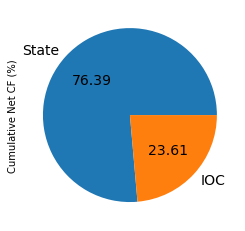

In [12]:
# Sum of net cash flows for State and IOC
series = df[['State Net Cash Flow ($m)', 'IOC Net Cash Flow ($m)']].sum()

series.index = ['State', 'IOC']
series.name = 'Cumulative Net CF (%)'
series.plot.pie(autopct='%.2f', fontsize=14, figsize=(4, 4));

### Plot Net Cash Flows

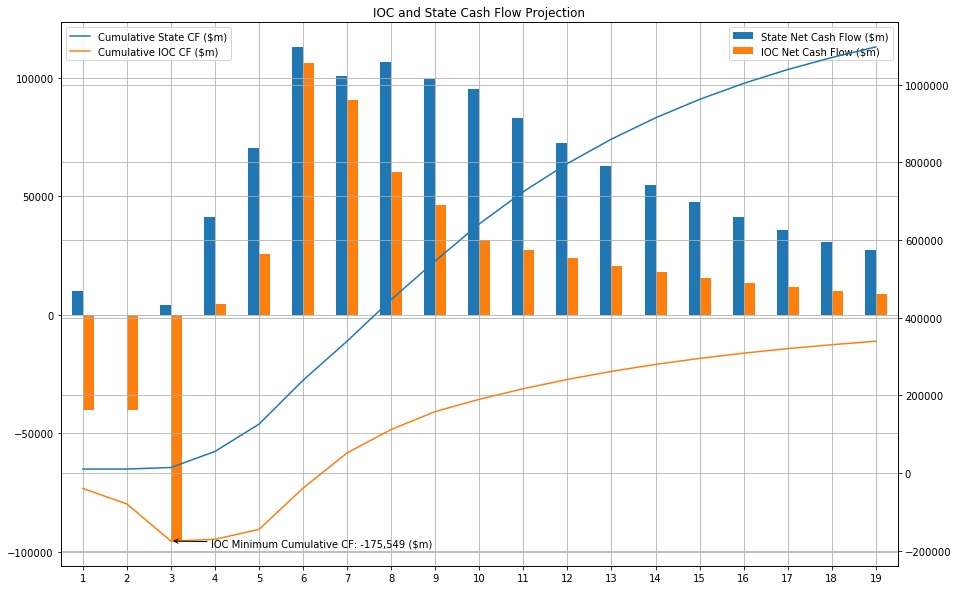

In [13]:
# Computing cumulative cash flow
cum = df[['State Net Cash Flow ($m)', 
    'IOC Net Cash Flow ($m)']].cumsum().rename(
     columns={'State Net Cash Flow ($m)':'Cumulative State CF ($m)',
              'IOC Net Cash Flow ($m)':'Cumulative IOC CF ($m)'})

# Plotting the Cash Flows
ax1 = df[['State Net Cash Flow ($m)',
         'IOC Net Cash Flow ($m)']].reset_index(drop=True).plot(kind='bar',
                                                                grid=True)
ax2 = ax1.twinx()
cum.reset_index(drop=True).plot(kind='line', ax=ax2, grid=True, alpha=1,
                                legend=True, figsize=(15,10),
                                title='IOC and State Cash Flow Projection');
ax1.set_xticklabels(df.index, rotation=0);

# find minimum cummulative cash flow
year_cf_min = cum['Cumulative IOC CF ($m)'].idxmin()
cf_min = cum.loc[year_cf_min, 'Cumulative IOC CF ($m)']
ann = 'IOC Minimum Cumulative CF: {:,.0f} ($m)'.format(cf_min)

ax2.annotate(ann, ((year_cf_min-1), cf_min), xycoords='data', xytext=(40, -5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.show()

In Part 1 we built a financial model for production sharing agreement with python scripts. The next part will show the way for the estimation of risk.

## Part 2. Risk Assessment 
To deal with uncertain world, the modeller should assess the influence of external and internal project factors to investment aggregates like NPV and IRR. To solve this task we will do the following:
1. Encapsulate our calculation steps from Part 1 into python class. That will allow us to manipulate with the project as with an object.
2. Perform sensitivity analysis by calculating NPV and IRR while changing some input parameters.
3. Introduce Monte Carlo simulation to get distributions for NPV and IRR.
4. Build dashboard to nicely present the results of the PSA CF estimation and analysis.

Below are the python implementation and scripts with comments. 

### Model as a Python Class

In [14]:
class PSAFinModel(object):
    """An object for calculating and modeling of financial data
    and cash flow of production sharing agreement
    """
    
    def __init__(self, prod_cap_op_cost, parameters_dict):
        """Input data:
        """
        self.prod_cap_op_cost = prod_cap_op_cost
        self.p = parameters_dict
    
        # cash-flow projection DataFrame
        self.df = pd.DataFrame(np.zeros((19,23)), index=[*range(1,20)])
        self.df.columns = [
            'Production (1,000 bbl)', 'Oil Price ($/bbl)', 'Gross Revenue ($m)',
            'Royalty ($m)', 'Net Revenue ($m)', 'Capital Costs ($m)',
            'Depreciation ($m)', 'Operating Cost ($/1000 bbl)',
            'Operating Expense ($m)', 'Total Expenses ($m)',
            'Cost Recovery Limit ($m)', 'C/R C/F ($m)', 'Cost Recovery ($m)',
            'Total Profit Oil ($m)', 'State Profit Oil Share ($m)',
            'IOC Profit Oil Share ($m)', 'Signature Bonus ($m)',
            'Taxable Income ($m)', 'Income Tax ($m)', 'IOC Net Cash Flow ($m)',
            'IOC DCF @ 12% (half-year)', 'State Net Cash Flow ($m)',
            'State DCF @ 12% (half-year)']
        self.df.index.name = 'Year'
        
        # project kpi DataFrame
        self.kpi = pd.DataFrame(np.zeros((6,3)),
                                columns=['IOC', 'State', 'Project'],
                                index=['CCF ($m)', 'NPV ($m)', 'IRR (%)',
                                       'PP (y)', 'DPP (y)', 'PI'])
        
        
    def get_ncf(self):
        """Step by step calculation of net cash flow of IOC and State
        """
        
        # Set input data
        self.df[['Production (1,000 bbl)', 'Capital Costs ($m)',
                 'Operating Cost ($/1000 bbl)']] = self.prod_cap_op_cost.values
        
        # Revenue
        # Set a price USD per bbl. for each year
        self.df['Oil Price ($/bbl)'] = self.p['Oil Price ($/bbl)']
        # Calculate Gross Revenue, in thousand USD
        self.df['Gross Revenue ($m)'] = self.df[['Production (1,000 bbl)',
                                                 'Oil Price ($/bbl)']].\
                                                 prod(axis=1) # $m
        # Calculate Royalty and net Revenue
        self.df['Royalty ($m)'] = self.df['Gross Revenue ($m)'].\
                                  multiply(self.p['Royalty Rate'])
        self.df['Net Revenue ($m)'] = self.df['Gross Revenue ($m)'] - \
                                      self.df['Royalty ($m)']
        
        # Capital Costs and Depreciation
        # Find first of operation year (lets play algo)
        prod_gt0 = (self.df['Production (1,000 bbl)'] > 0)
        first_year_of_operation = self.df.index[prod_gt0][0]
        # Calculate depreciation, starting no earlier than 1st year of operation
        depr_schedule = pd.DataFrame(0., index=self.df.index,
                         columns=self.df.index[self.df['Capital Costs ($m)']>0])
        # Assign yearly depreciation values
        depr_schedule.loc[1:self.p['Depreciation Term'],:] = \
                        self.df['Capital Costs ($m)'].\
                        where(self.df['Capital Costs ($m)']>0) / \
                        self.p['Depreciation Term']
        # Shift depreciation to proper years
        depr_schedule = depr_schedule.apply(lambda x: 
                                            x.shift(max(first_year_of_operation,
                                                        x.name) - 1,
                                                    fill_value=0), axis=0)
        # Finally, sum all depreciation schedule into net Depreciation
        self.df['Depreciation ($m)'] = depr_schedule.sum(axis=1)
 
        # Operating Costs
        # Calculate Operating Expense 
        self.df['Operating Expense ($m)'] = self.df[['Production (1,000 bbl)', 
                                   'Operating Cost ($/1000 bbl)']].prod(axis=1)
        # Total Expense
        self.df['Total Expenses ($m)'] = self.df[['Operating Expense ($m)',
                                              'Depreciation ($m)']].sum(axis=1)

        # Cost Recovery
        self.df['Cost Recovery Limit ($m)'] = self.df['Gross Revenue ($m)'] * \
                                              self.p['Cost Recovery Limit']
        # Cost Recovery Carry Forward
        self.df['C/R C/F ($m)'] = (self.df['Total Expenses ($m)'] - 
                                   self.df['Cost Recovery Limit ($m)']).\
                                   cumsum().clip(lower=0)

        self.df['Cost Recovery ($m)'] = np.minimum(
                                          self.df['Total Expenses ($m)'] + 
                                          self.df['C/R C/F ($m)'].\
                                                shift(1, fill_value=0),
                                          self.df['Cost Recovery Limit ($m)'])  
        
        # Profit Oil
        # Calculate Profit Oil
        self.df['Total Profit Oil ($m)'] = self.df['Net Revenue ($m)'] - \
                                           self.df['Cost Recovery ($m)']
        # Calculate split of profit oil between IOC and State
        self.df['State Profit Oil Share ($m)'] = \
                                            self.df['Total Profit Oil ($m)'] * \
                                            (1 - self.p['IOC Profit Oil Split'])
        self.df['IOC Profit Oil Share ($m)'] = \
                                            self.df['Total Profit Oil ($m)'] * \
                                            self.p['IOC Profit Oil Split']

        # Bonuses and Taxes of IOC
        # Signature bonus in case a PSA is signed
        self.df.at[1,'Signature Bonus ($m)'] = self.p['Signature Bonus']
        # Calculate operating income
        operating_income = (self.df[['Cost Recovery ($m)',
                                     'IOC Profit Oil Share ($m)']]\
                                                .sum(axis=1) -\
                            self.df[['Total Expenses ($m)',
                                     'Signature Bonus ($m)']].sum(axis=1))

        # Create function and calculate loss carry forward (no term limits)
        loss_carry_forward = np.frompyfunc(lambda a,b: a+b if a < 0
                                           else b, 2, 1)
        self.df['Taxable Income ($m)'] = loss_carry_forward.accumulate(
                                      operating_income.values, dtype=np.object)

        # Calculate Income Tax of IOC
        self.df['Income Tax ($m)'] = self.df['Taxable Income ($m)']\
                                  .multiply(self.p['Income Tax']).clip(lower=0)
            
        # IOC Free Cash Flow
        self.df['IOC Net Cash Flow ($m)'] = (self.df[['Cost Recovery ($m)',
                                    'IOC Profit Oil Share ($m)']].sum(axis=1) -\
                                             self.df[['Capital Costs ($m)',
                                                      'Operating Expense ($m)',
                                                      'Signature Bonus ($m)',
                                                      'Income Tax ($m)']]\
                                                  .sum(axis=1))
        self.df['IOC DCF @ 12% (half-year)'] = \
                            self.df['IOC Net Cash Flow ($m)'] / \
                            (1 + self.p['Discount Rate'])**(self.df.index - 0.5)

        # State Free Cash Flow
        self.df['State Net Cash Flow ($m)'] = \
          self.df[['Signature Bonus ($m)', 'Royalty ($m)',
                   'State Profit Oil Share ($m)','Income Tax ($m)']].sum(axis=1)
        self.df['State DCF @ 12% (half-year)'] = \
                             self.df['State Net Cash Flow ($m)'] / \
                            (1 + self.p['Discount Rate'])**(self.df.index - 0.5)
            
        return self.df[['IOC Net Cash Flow ($m)',
                        'IOC DCF @ 12% (half-year)',
                        'State Net Cash Flow ($m)',
                        'State DCF @ 12% (half-year)']]

    
    def get_kpi(self):
        """Module to calculate investment project indicators:
        Cumulative Cash Flow, Net Present Value, Internal Rate of Return,
        Payback Period, Discounted Payback Period, Profitability Index
        for investment decision making.
        """

        def payback_period(ts):
            """Function to calculate PP with for input time-series
            """
            if not (ts[ts.cumsum() > 0].empty | ts[ts.cumsum() < 0].empty):
                final_full_year = ts[ts.cumsum() < 0].index.values.max()
                fractional_yr = - ts.cumsum()[final_full_year] / \
                                  ts[final_full_year + 1]
                pp = (final_full_year + fractional_yr)
                pp = round(pp, 1)
            elif ts[ts.cumsum() < 0].empty:
                pp = 0
            else:
                pp = np.nan
            return pp
        
        profitability_index = lambda ts:round(((ts>0)*(1-ts.cumsum()
                     / ts.cumsum().min())).max(), 1) if ts.min() < 0 else np.inf
        
        irr = lambda dcf: round(npf.irr(dcf)*100, 1) \
                                            if not np.isnan(npf.irr(dcf)) else 0

        # a loop to get kpi values
        for i, (cf, dcf) in enumerate([(self.df['IOC Net Cash Flow ($m)'],
                                        self.df['IOC DCF @ 12% (half-year)']),
                                    (self.df['State Net Cash Flow ($m)'],
                                     self.df['State DCF @ 12% (half-year)']),
                        (self.df[['IOC Net Cash Flow ($m)',
                                  'State Net Cash Flow ($m)']].sum(axis=1),
                         self.df[['IOC DCF @ 12% (half-year)',
                                  'State DCF @ 12% (half-year)']].sum(axis=1))
                                    ]):
            self.kpi.iloc[:,i] = [round(cf.sum(), 1),
                                  round(dcf.sum(), 1),
                                  irr(cf),
                                  payback_period(cf),
                                  payback_period(dcf),
                                  profitability_index(dcf)]
        self.kpi.index.name = 'Parameter'
       
        return self.kpi    

In [15]:
# Set input parameters
# Dictionary with major inputs
psa_parameters_dict = {
    'Oil Price ($/bbl)': 20,     # Oil price $20/bbl for the model estimation
    'Royalty Rate': 0.1,         # Royalty rate 10%
    'Cost Recovery Limit': 0.5,  # Up to 50% of Gross Revenue
    'IOC Profit Oil Split': 0.4, # IOC 40%/ State 60%
    'Income Tax': 0.3,           # CIT 30%
    'Signature Bonus': 1e7/1e3,  # Signature Bonus $10M
    'Depreciation Method': 'SL', # Straight Line depreciation of capital assets
    'Depreciation Term': 5,      # 5 years
    'Discount Rate': .12         # 12% discount rate
}

# DataFrame with input time-series
input_estimates = pd.DataFrame(
    {'Production (1,000 bbl)': [0, 0, 578, 6100, 9420, 12400, 10850, 9494, 8307,
                                7269,6360, 5565, 4869, 4261, 3728, 3262, 2854,
                                2498, 2185],
     'Capital Costs ($m)': [30000, 40000, 100000, 60000, 70000] + [0]*14,
     'Operating Cost ($/1000 bbl)': [0, 0, 5.5, 2.6, 2.4, 2.3, 2.36, 2.4, 2.46,
                                     2.54, 2.64, 2.72, 2.82, 2.94, 3.08, 3.24,
                                     3.4, 3.6, 3.4]
    },    
    index=[*range(1,20)]
                              )

After the above manipulation it takes just a few strings of code to calculate prognosis cash flow and KPIs.

In [16]:
# initiate object for calculations
psa = PSAFinModel(prod_cap_op_cost=input_estimates,
                  parameters_dict=psa_parameters_dict)

# calculate CF and DCF with get_ncf method
psa.get_ncf();
# calculate project kpi's
kpi = psa.get_kpi()
kpi

,IOC,State,Project
Parameter,,,
CCF ($m),339130.8,1097050.5,1436181.3
NPV ($m),62798.0,408998.1,471796.1
IRR (%),19.5,0.0,51.5
PP (y),6.4,0.0,5.1
DPP (y),8.0,0.0,5.4
PI,1.4,inf,4.6


### Sensitivity Analysis

For this part of modelling we will implement calculation of project NPV on deviation in each of the following inputs: production, oil price, capital costs and operational cost with range from -50% to 50%.

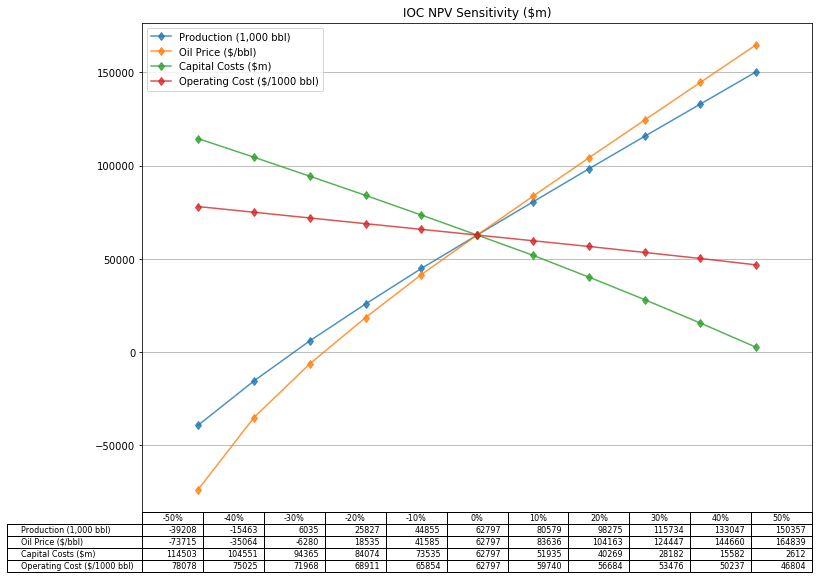

In [17]:
class PSAFinModelSens(PSAFinModel):
    """Class to deal with sensitivity
    """
    
    def get_sensitivity(self):
        """Module to calculate NPV sensitivity to deviation of price,
        production, capital and operating costs
        """
        # store 'base' input data for further reference
        if not hasattr(self, 'base'):
            self.base = self.prod_cap_op_cost.copy(deep=True)
            self.oil_price_base = self.p['Oil Price ($/bbl)']
        
        # Create a dataframe to store the resulting data
        res = pd.DataFrame(0., columns=['Production (1,000 bbl)',
                                        'Oil Price ($/bbl)',
                                        'Capital Costs ($m)',
                                        'Operating Cost ($/1000 bbl)'],
                          index=[*range(-50,51,10)])
        res.index.name = '%'
        
        # Calculate the NPV for each deviation from the base value
        for i in res.index:
            k = i * 0.01 + 1 
            for c in res.columns:
                if c == 'Oil Price ($/bbl)':
                    self.prod_cap_op_cost = self.base.copy()
                    self.p['Oil Price ($/bbl)'] = self.oil_price_base * k
                else:
                    self.prod_cap_op_cost = self.base.copy()
                    self.p['Oil Price ($/bbl)'] = self.oil_price_base
                    self.prod_cap_op_cost[c] = \
                                      self.prod_cap_op_cost[c].values * k
                
                self.get_ncf()
                res.at[i, c] = self.df['IOC DCF @ 12% (half-year)'].sum()
                
        return res
                    

# Creating an instance of the object
psa_sens = PSAFinModelSens(prod_cap_op_cost=input_estimates,
                           parameters_dict=psa_parameters_dict)

# Get the dataframe with sensitivity analysis results
sens = psa_sens.get_sensitivity()

# Plot the results of Sensitivity analysis
sens.index = sens.index.astype(str) + '%'

ax3 = sens.astype(int).plot(figsize=(12,9), alpha=0.8, grid=True,
          title='IOC NPV Sensitivity ($m)', table=True, style='d-')
# Some finer adjustment for the plot
ax3.get_xaxis().set_visible(False)
ax3.set_xlim(ax3.get_xlim()[0] - .5, ax3.get_xlim()[1] + .5)
tb = ax3.tables[0]
tb.auto_set_font_size(False)
tb.set_fontsize(8)


### NPV Profile

In [18]:
# Create a copy of reference dictionary with input data
psa_parameters_dict_be = psa_parameters_dict.copy()

def get_npv(oil_price, discount_rate=12):
    """Function with price and discount rate input
    to return NPV of IOC
    """
    global input_estimates, psa_parameters_dict_be    
    psa_parameters_dict_be['Oil Price ($/bbl)'] = oil_price
    psa_parameters_dict_be['Discount Rate'] = discount_rate / 100
    psa = PSAFinModel(prod_cap_op_cost=input_estimates,
                      parameters_dict=psa_parameters_dict_be)
    psa.get_ncf()
    return (psa.df['IOC DCF @ 12% (half-year)'].sum())

# Create DataFrame to store NPV values for different discount rate and oil price
npv_profile = pd.DataFrame(0., index=np.linspace(5, 24, 20),
                           columns=[15, 20, 25])
for dr in npv_profile.index:
    for op in npv_profile.columns:
        npv_profile.at[dr, op] = get_npv(op, dr) * 1e-3

# Plot the resulting NPV Profile and spread
(hv.HLine(0).opts(line_width=1, color='black') * hv.Spread((npv_profile.index,
                                                           npv_profile[20],
    (npv_profile[20]-npv_profile[15]), (npv_profile[25]-npv_profile[20])),
     vdims=['y', 'yerrneg', 'yerrpos']).opts(fill_alpha=0.3)\
         .opts(color=hv.Palette('Greens')) * \
     hv.Curve((npv_profile.index, npv_profile[20])) \
         .opts(color=hv.Palette('Greens'))).opts(
     title='NPV Profile for oil prices 20 ± 5 ($/bbl)', width=800, height=400,
     show_grid=True, ylabel='IOC NPV ($M)', xlabel='Discount Rate (%)')

:Overlay
   .HLine.I  :HLine   [x,y]
   .Spread.I :Spread   [x]   (y,yerrneg,yerrpos)
   .Curve.I  :Curve   [x]   (y)

### Breakeven Oil Price
This approach on the figure above shows us a way to estimate breakeven price, in the point where the green line crosses zero. 
So far, we will introduce the separate function for the calculation of breakeven oil price.

In [19]:
def get_breakeven(x):
    """Function with price input to return NPV squared,
    which allows to find breakeven price minimizing NPV to zero
    """
    return (get_npv(x[0]))**2  # the function from NPV Profile is used


# getting breakeven price
min_res = minimize(get_breakeven, 20, tol=1e-2)
breakeven_price = min_res.x[0]

print('IOC breakeven oil price: \t${:,.3f} $/bbl'.format(breakeven_price))

IOC breakeven oil price: 	$14.485 $/bbl


### Monte Carlo Simulation
For now, we consider the Monte Carlo approach, which repeats calculation many times with the input data sampled from the predefined distributions. Let us chose truncated standard normal and triangle distributions (BetaPERT distribution, or any other, can be implemented similarly).

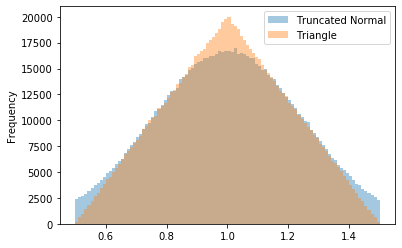

In [20]:
N = 1000000  # amount of samples from the distributions

# generating truncated normal distribution samples and scaling them
mc_truncnorm = truncnorm.rvs(-2., 2., size=N) * 0.25 + 1
# generating triangle distribution samples and scaling them
mc_triang = triang.rvs(.5, size=N) + 0.5

# creating DataFrame with samples and plotting it
df_mc = pd.DataFrame({'Truncated Normal': mc_truncnorm, 'Triangle': mc_triang})
df_mc.plot(kind='hist', bins=100, alpha=0.4);

We can see that both distributions quite similar. For more balanced result the truncated normal will be selected for further computations. 

To proceed with quite a lot of paths we will need to implement multiprocessing calculations for speeding up. Let’s see where it goes.

In [21]:
%%time

N = 10000
# creating N Monte Carlo paths (deviations of initial input data)
mc_truncnorm = truncnorm.rvs(-2., 2., size=(N, 19, 3)) * 0.25 + 1

# similar approach to triangle distribution
mc_triang = triang.rvs(.5, size=(N, 19, 3)) + 0.5

Wall time: 9.72 s


In [22]:
%%time

# windows approach for multiprocessing
def main1(r, numThreads=12):
    # The following aproach is sourced from the book Marcos de Prado "Advances in Machinene"
    parts=np.linspace(0,r.shape[0],min(numThreads,r.shape[0])+1)
    parts,jobs=np.ceil(parts).astype(int),[]
    for i in range(1,len(parts)):
        jobs.append(r[parts[i-1]:parts[i]]) # parallel jobs
    pool,out=mp.Pool(processes=numThreads),[]
    outputs=pool.imap_unordered(mcs.get_npv_irr,jobs)
    for out_ in outputs: out+=out_  # asyncronous response
    pool.close();pool.join()
    return out

# unix (mac os) approach for multiprocessing
def get_npv_irr(mc):
    """Function to get NPV and IRR for each Monte Carlo path
    """
    # getting the previously set input parameters
    global input_estimates, psa_parameters_dict
    # make a copy for further adjustment
    psa_parameters_dict_mc = psa_parameters_dict.copy()
    input_estimates_mc = input_estimates.copy()
    
    # set the MC path values according to input 2D array
    psa_parameters_dict_mc['Oil Price ($/bbl)'] *= mc[0, 0]
    input_estimates_mc *= mc[:, :3]
    
    psa = PSAFinModel(prod_cap_op_cost=input_estimates_mc,
                      parameters_dict=psa_parameters_dict_mc)
    psa.get_ncf()
    return [psa.df['IOC DCF @ 12% (half-year)'].sum(),
            npf.irr(psa.df['IOC Net Cash Flow ($m)'])*100]

# implementing multiprocessing to speed up calculations
if __name__ == '__main__':
    if mp.get_start_method() == 'spawn':  # for win
        import mc_simulation as mcs
        res = main1(mc_truncnorm)
        res_ = main1(mc_triang)
    elif mp.get_start_method() == 'fork':  # for unix
        with Pool() as p:
            res = p.map(get_npv_irr, mc_truncnorm)
            res_ = p.map(get_npv_irr, mc_triang)
    else:  # a dummy for 'forkserver' platform
        res, res_ = mc_truncnorm[:,:2,0], mc_triang[:,:2,0]

Wall time: 1min 14s


In [23]:
# storing the resulting NPV and IRR values into DataFrame for plotting
mc_res = pd.DataFrame(res, columns=['NPV ($m) - truncnonrm',
                                    'IRR (%) - truncnonrm']).join(
          pd.DataFrame(res_, columns=['NPV ($m) - triang',
                                      'IRR (%) - triang']))

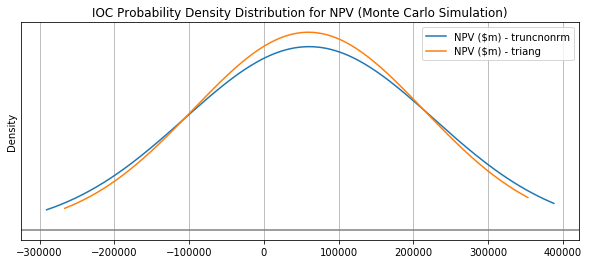

In [24]:
ax1 = mc_res[['NPV ($m) - truncnonrm',
        'NPV ($m) - triang']].plot.density(grid=True, bw_method=3, yticks=[],
                                           figsize=(10, 4),
                         title=('IOC Probability Density Distribution for' +
                                ' NPV (Monte Carlo Simulation)'))
ax1.axhline(0, c='grey')
plt.show()

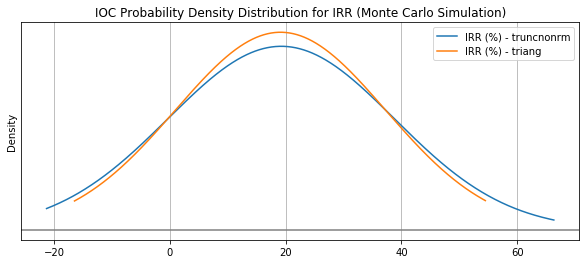

In [25]:
ax2 = mc_res[['IRR (%) - truncnonrm',
        'IRR (%) - triang']].plot.density(grid=True, bw_method=3, yticks=[],
                                          figsize=(10, 4),
                        title=('IOC Probability Density Distribution for' +
                                ' IRR (Monte Carlo Simulation)'))

ax2.axhline(0, c='grey')
plt.show()

### Interactive Dashboard for Scenario Analysis 
Lastly, we will present an interactive dashboard HoloMap for presentation purposes. Current implementation will show preliminary calculated results, whereas DynamicMap could recalculate on the go thus presenting even more powerful options. We will create a menu to manually change project parameters that we previously modeled as well as some others.

In [29]:
def dashboard(rr, crl, split, cit, price, prod, capex,
              input_estimates=input_estimates,
              psa_parameters_dict=psa_parameters_dict):
    """A function to create visuals for plotting in the dashboard
    """
    # making a copy not to change the base values
    params = psa_parameters_dict.copy()
    estimates = input_estimates.copy()
    
    # adjusting inputs according to the value of a parameter in dashboard
    params['Royalty Rate'] = rr / 100
    params['Cost Recovery Limit'] = crl / 100
    params['IOC Profit Oil Split'] = split / 100
    params['Income Tax'] = cit / 100
    params['Oil Price ($/bbl)'] = price
    
    estimates['Production (1,000 bbl)'] *= (prod / 100)
    estimates['Capital Costs ($m)'] *= (capex / 100)
    
    # initiate object for calculations
    psa = PSAFinModel(prod_cap_op_cost=estimates,
                      parameters_dict=params)

    # calculate CF and DCF with get_ncf method
    psa.get_ncf()
    # calculate project kpi's
    kpi = psa.get_kpi()
    
    # create a holoviews table for the dashboard
    table = hv.Table(kpi.reset_index()).options(width=700,
                                                title='Project Performance')
    
    # prepare data and create holoviews bar chart for the dashboard
    df_fcf = psa.df[['IOC Net Cash Flow ($m)',
                  'State Net Cash Flow ($m)']].\
         rename(columns={"IOC Net Cash Flow ($m)": "IOC Net Cash Flow",
                         "State Net Cash Flow ($m)": "State Net Cash Flow"}).\
         div(1e3).reset_index().melt(id_vars=['Year'], var_name='Entity',
                                     value_name='Value')

    bars = hv.Bars(df_fcf, ['Year', 'Entity'], hv.Dimension('Value', unit='$M',
                                                            range=(-120, 300)))\
       .options(color=hv.Cycle('Category20'), show_legend=True, stacked=True,
                tools=['hover'], height=400, width=700,
                legend_position='top_right', title_format='Project Cash Flow')
    
    return (table + bars).cols(1)


In [ ]:
# Creating a dictionary to contain visuals
dashboard_dict = {(rr, crl, split, cit, price, prod, capex):
                  dashboard(rr, crl, split, cit, price, prod, capex)
                      for rr in [5, 8, 10]
                          for crl in [50, 60]
                              for split in [40, 50, 60]
                                  for cit in [15, 20, 30]
                                      for price in [15, 20, 25]
                                          for prod in [90, 100, 110]
                                              for capex in [90, 100, 110]
                 }

In [ ]:
# Drawing a Dashboard with scenarios
OutputSettings.options['max_frames'] = 2000
kdims=['Royalty Rate (%)', 'Cost Recovery Limit (%)',
       'IOC/State Profit Oil Split (%)', 'Income Tax (%)', 'Oil Price ($/bbl)',
       'Production (%)', 'Capital Cost (%)']
hv.HoloMap(dashboard_dict, kdims=kdims, sort=True).collate().opts(title='')

Upper four parameters (royalty rate, cost recovery limit, profit oil split and income tax) are characteristics of PSA terms and conditions. One could simply find that they are the elements of a zero sum game between IOC and State. The bottom three parameters (oil price, production level and capital costs) are mostly external, although production, and capital cost are more or less manageable by the IOC operator.

## Concluding Remarks

Some parts of this model may look overcomplicated in comparison to Excel. It’s probably a matter of dealing with new technology, which may just be different from the software that you already know.

Let us summarize macro-level benefits of building financial models with Python: 
- Python has developed an ecosystem of data science and financial engineering easy-to-use tools (for free) 
- Python allows the building of simple-to-complex models and integrates them within corporate information infrastructure 
- The open-source nature of Python allows to control all the computational and modeling aspects, in addition to securely storing sensitive modeling data within the corporate environment. 

Regarding the above PSA financial model specifically, it could be augmented by models to estimate reserves and production profiles, as well as perform modeling CAPEX and OPEX breakdown for the better analysis of alternative scenarios. In addition, frequency change from years to quarters (or months), introducing working capital and other improvements could easily be implemented. Moreover, such models could be easily combined into portfolios for analysis on the portfolio level.

However, the evident disadvantage of this approach is the lack of Python programming skills among financial industry professionals.  The evident solution is to invest in personnel skills instead of licenses.

For the convenience of the reader, full version of implementation is available as an HTML and Jupyter notebook [at Github](https://github.com/MikhailShi/psa-financial-model).

Please, feel free to comment and/or provide your feedback to the author.  


Mikhail Shishlenin, 2/2/2020